# Exploratory Data Analysis of used Toyota car

The primary goal of this project is to submit the assignment of the workshop "Data visualization with Python" conducted by EMK Center. 
<br>The objective of this project is EDA of used Toyota car by barplot, scatter plot, Histogtam, Distribution plot.
<br>The dataset is collected from Kaggle. 
<br>dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### Exploratory Data Analysis

In [1]:
# required libraries for data analysis
import pandas as pd
import numpy as np

# required libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset information

The cleaned data set contains information of price, transmission, mileage, fuel type, year, model, miles per gallon (mpg), and engine size.

### Loading the dataset

In [2]:
# import the data
# read a csv file as pandas DataFrame
df = pd.read_csv("toyota.csv")

# check the first 5 rows
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


### Create a function to find the number of obsevations for unique value in a column of a DataFrame

In [36]:
def unique_percent_count(data, col):
    
    col_count = data[col].value_counts(normalize = True)
    col_count = col_count*100
    col_count = pd.DataFrame(col_count)
    col_count = col_count.reset_index()
    col_count = col_count.rename(columns={'index':col, col:'% of cars'})
    col_count['% of cars'] = col_count['% of cars'].round(2)

    return col_count

In [37]:
fuelType_count = unique_percent_count(df, "fuelType")
transmission_count = unique_percent_count(df, "transmission")
model_count = unique_percent_count(df, "model")
year_count = unique_percent_count(df, "year")
year_count = year_count.sort_values(by = "year")

### Create a function to show the number of observations for each unique value in a column using a Barplot

In [38]:
def barplot(data, x_col, y_col,color, yticks, rotation):
    
    sns.barplot(x=x_col, y = y_col, data=data, color =color)
    plt.title("Percentage of cars Percentage for each " + x_col)
    plt.yticks(yticks)
    plt.xticks(rotation=rotation)

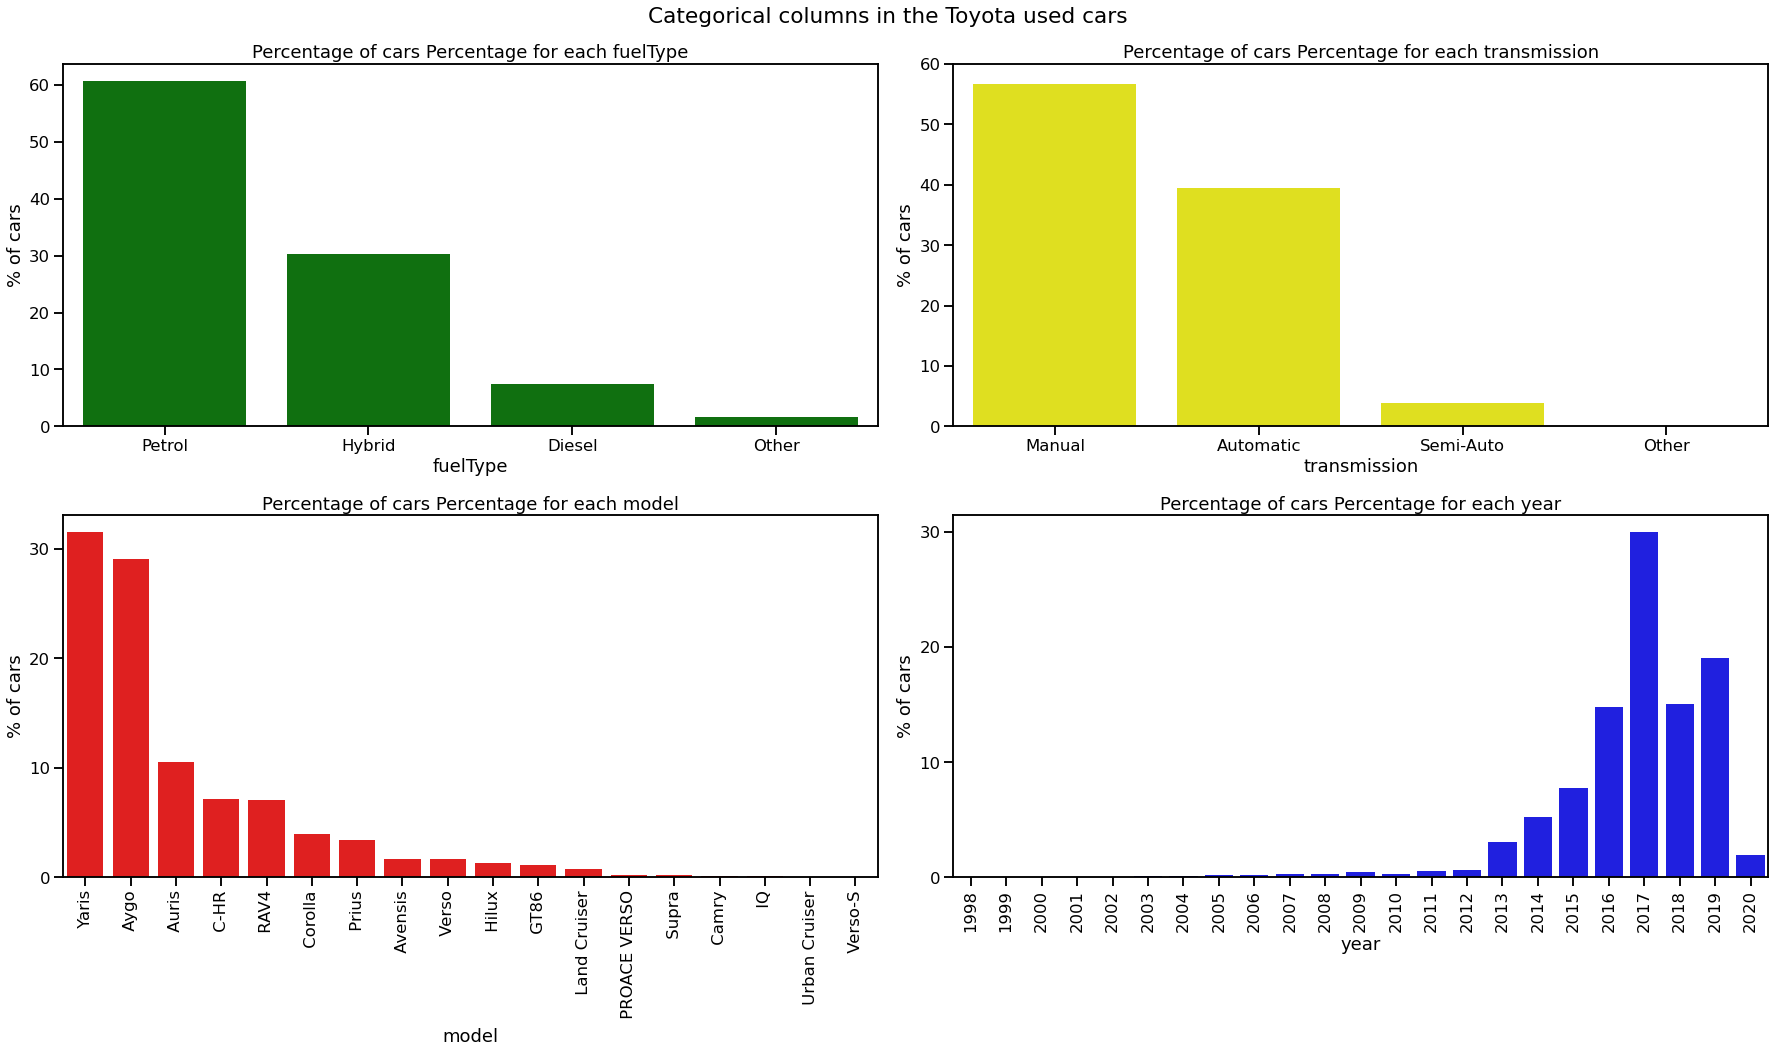

In [39]:
sns.set_context("talk")

plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
barplot(fuelType_count,"fuelType", "% of cars", "green",np.arange(0,70,10), 0)

plt.subplot(2,2,2)
barplot(transmission_count,"transmission", "% of cars","yellow",np.arange(0,70,10), 0)

plt.subplot(2,2,3)
barplot(model_count, "model", "% of cars", "red", np.arange(0,40,10), 90)

plt.subplot(2,2,4)
barplot(year_count, "year", "% of cars","blue",np.arange(0,40,10), 90)

plt.suptitle('Categorical columns in the Toyota used cars')

plt.tight_layout()

### Analysis with Scatter plot 

In [37]:
def scatter_plot(data, x_col, y_col, hue):
    sns.scatterplot(x=x_col, y = y_col, data=data, hue =hue)
    plt.title(x_col+' vs '+y_col +' scatter_plot')

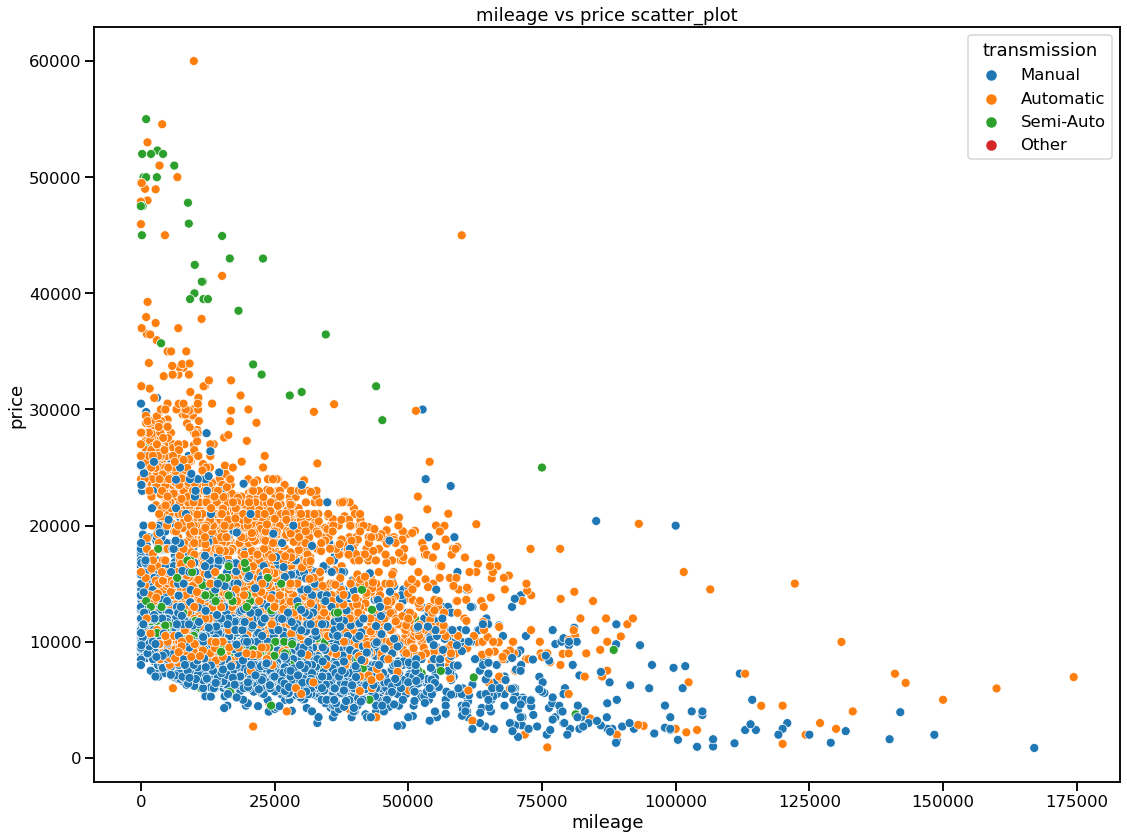

In [38]:
plt.figure(figsize=(16,12))
scatter_plot(df, 'mileage', 'price', 'transmission')

plt.tight_layout()

### Findings from scatter plot:
 The price of Semi-Auto cars is mostly in high & medium range.
<br> The price of manual cars is low.
<br> The price of Automatic cars is high.

### Analysis with Histogram

In [44]:
def histogram(data, x_col, binwidth, xticks, rotation):
    sns.histplot(x=x_col, binwidth= binwidth, data=data)
    
    plt.yticks(np.arange(0, 3100,1000))
    plt.xticks(xticks, rotation=rotation)

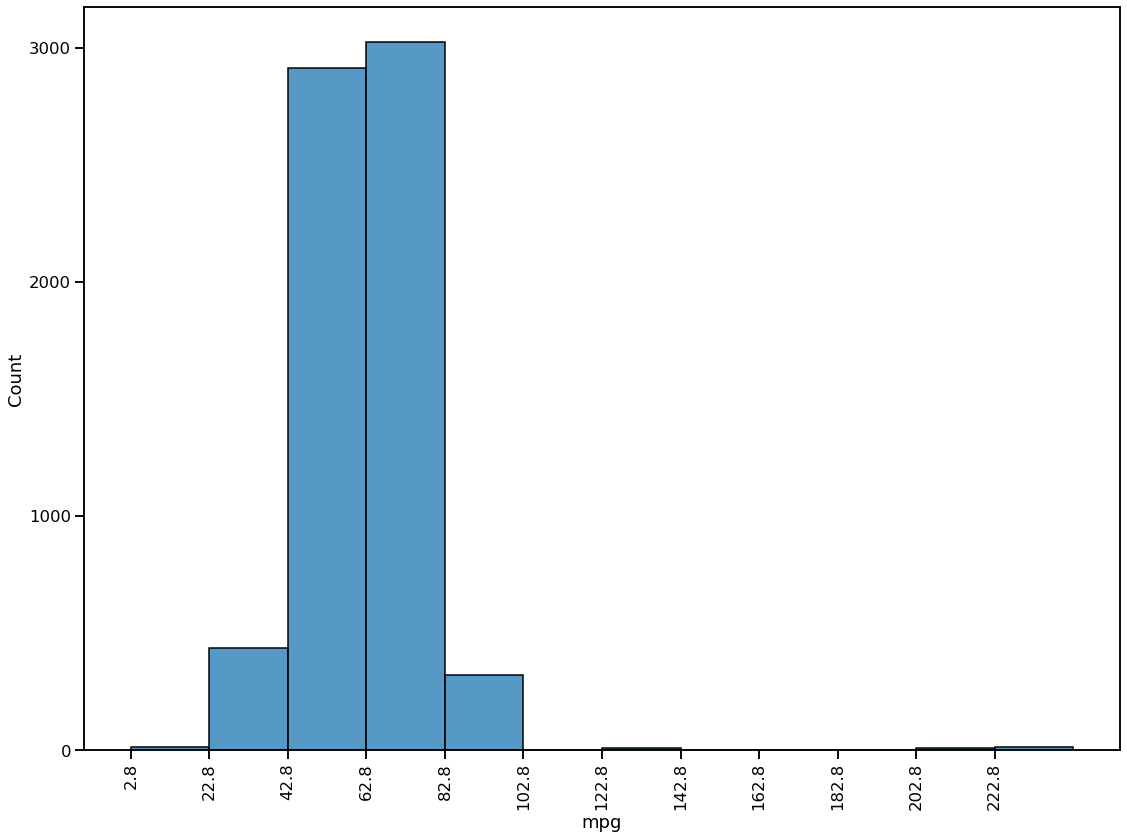

In [47]:
plt.figure(figsize=(16,12))
histogram(df, 'mpg', 20, np.arange(2.80, 235,20),90)
plt.tight_layout()

### Analysis with ECDF Plot

In [50]:
def ECDF(data, x_col, binwidth):
    sns.histplot(x=x_col, binwidth= binwidth, data=data, cumulative=True)

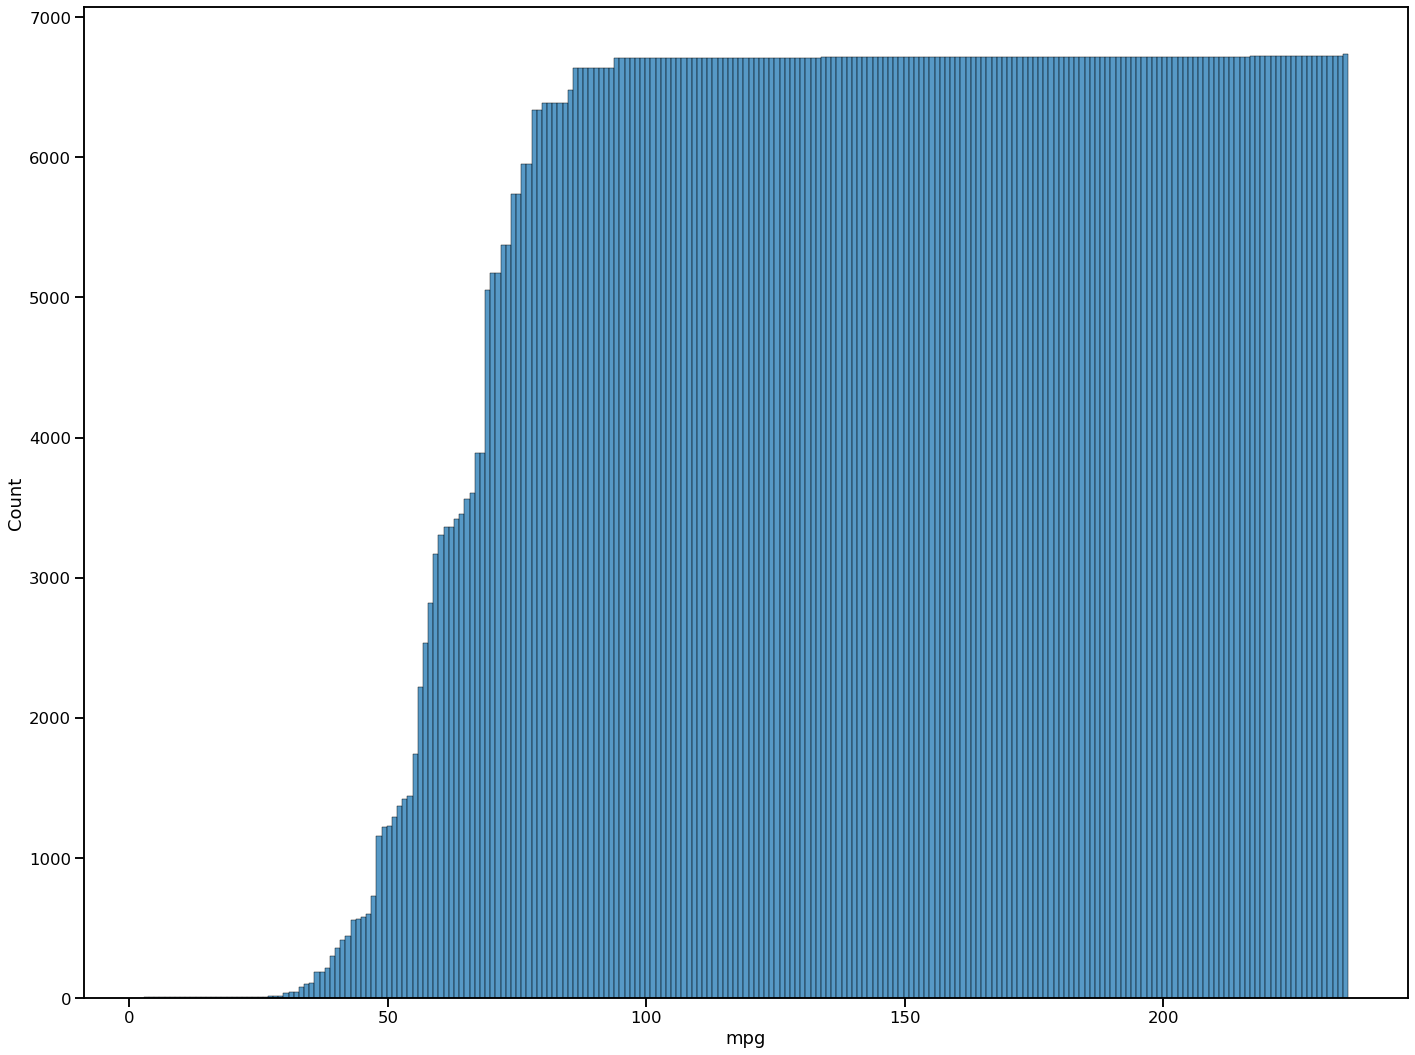

In [51]:
plt.figure(figsize=(20,15))
distribution_plot(df,'mpg',1)

plt.tight_layout()
plt.show()

### Analysis with Distribution Plot

In [52]:
def distribution_plot(data, x_col, binwidth):
    sns.histplot(x=x_col, binwidth= binwidth, data=data, kde=True)

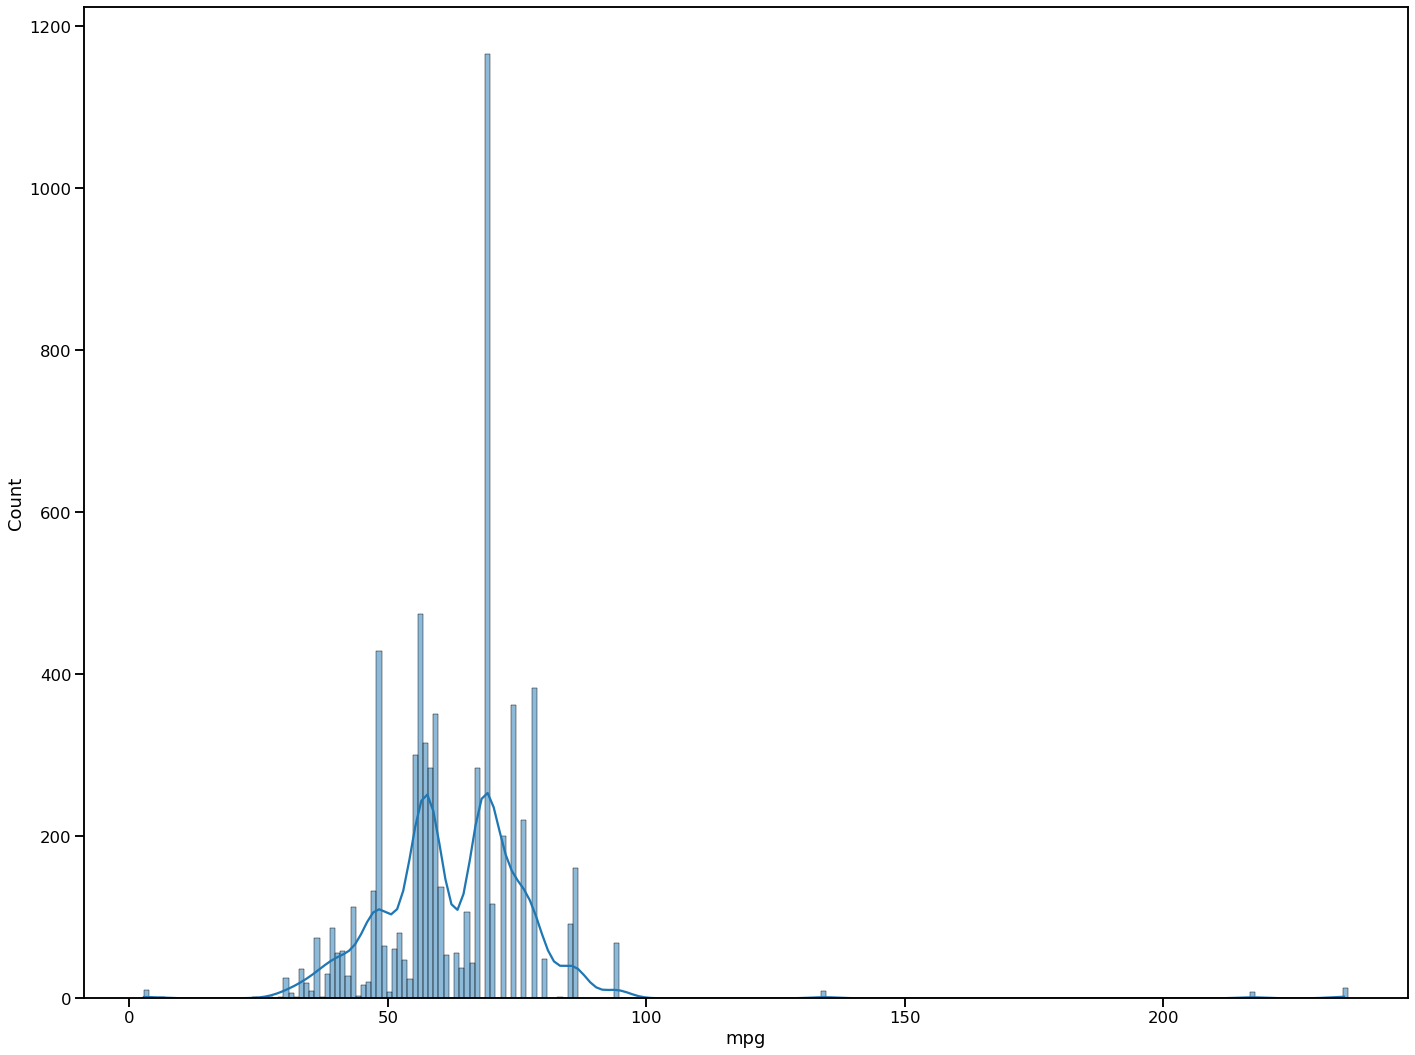

In [53]:
plt.figure(figsize=(20,15))
distribution_plot(df,'mpg',1)

plt.tight_layout()
plt.show()